In [1]:
# Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing


In [2]:
df_ireland = pd.read_csv('df_ireland_drop.csv')
# looking at the dataset
df_ireland.head()

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure
1,1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure
2,2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure
3,3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure
4,4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure


In [3]:
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9181 entries, 0 to 9180
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9181 non-null   int64  
 1   Domain Code       9181 non-null   object 
 2   Domain            9181 non-null   object 
 3   Area Code (M49)   9181 non-null   int64  
 4   Area              9181 non-null   object 
 5   Element Code      9181 non-null   int64  
 6   Element           9181 non-null   object 
 7   Item Code (CPC)   9181 non-null   object 
 8   Item              9181 non-null   object 
 9   Year Code         9181 non-null   int64  
 10  Year              9181 non-null   int64  
 11  Unit              9181 non-null   object 
 12  Value             9181 non-null   float64
 13  Flag              9181 non-null   object 
 14  Flag Description  9181 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.1+ MB


In [4]:
df = df_ireland.query("Item=='Apples'")
df.head()

,Unnamed: 0,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
6,6,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1961,1961,ha,3000.0,E,Estimated value
7,7,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1962,1962,ha,3000.0,E,Estimated value
8,8,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1963,1963,ha,3000.0,E,Estimated value
9,9,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1964,1964,ha,2000.0,E,Estimated value
10,10,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01341,Apples,1965,1965,ha,1500.0,E,Estimated value


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 185
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        180 non-null    int64  
 1   Domain Code       180 non-null    object 
 2   Domain            180 non-null    object 
 3   Area Code (M49)   180 non-null    int64  
 4   Area              180 non-null    object 
 5   Element Code      180 non-null    int64  
 6   Element           180 non-null    object 
 7   Item Code (CPC)   180 non-null    object 
 8   Item              180 non-null    object 
 9   Year Code         180 non-null    int64  
 10  Year              180 non-null    int64  
 11  Unit              180 non-null    object 
 12  Value             180 non-null    float64
 13  Flag              180 non-null    object 
 14  Flag Description  180 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 22.5+ KB


In [6]:
df=df.drop(columns=['Item','Element Code','Unnamed: 0','Area','Year Code','Domain Code','Domain','Area Code (M49)','Item Code (CPC)','Flag'])
df.head()



,Element,Year,Unit,Value,Flag Description
6,Area harvested,1961,ha,3000.0,Estimated value
7,Area harvested,1962,ha,3000.0,Estimated value
8,Area harvested,1963,ha,3000.0,Estimated value
9,Area harvested,1964,ha,2000.0,Estimated value
10,Area harvested,1965,ha,1500.0,Estimated value


In [7]:
df1 = df.query("Unit=='ha'")
df1.head()


,Element,Year,Unit,Value,Flag Description
6,Area harvested,1961,ha,3000.0,Estimated value
7,Area harvested,1962,ha,3000.0,Estimated value
8,Area harvested,1963,ha,3000.0,Estimated value
9,Area harvested,1964,ha,2000.0,Estimated value
10,Area harvested,1965,ha,1500.0,Estimated value


In [8]:
df1['Flag Description'].value_counts()


Official figure      31
Estimated value      26
Imputed value         2
Unofficial figure     1
Name: Flag Description, dtype: int64

In [9]:
df2 = df.query("Unit=='hg/ha'")
df2.head()

#Исходная единица измерения гектограмм (hg) hg/ha гектограм на гектар

,Element,Year,Unit,Value,Flag Description
66,Yield,1961,hg/ha,96667.0,Imputed value
67,Yield,1962,hg/ha,103333.0,Imputed value
68,Yield,1963,hg/ha,116667.0,Imputed value
69,Yield,1964,hg/ha,120000.0,Imputed value
70,Yield,1965,hg/ha,140000.0,Imputed value


In [10]:
df2['Flag Description'].value_counts()

Estimated value    39
Imputed value      21
Name: Flag Description, dtype: int64

In [11]:
df3 = df.query("Unit=='tonnes'")
#df3.head()

In [12]:
df3['Flag Description'].value_counts()

Official figure    60
Name: Flag Description, dtype: int64

In [13]:
df3['Element'].value_counts()

Production    60
Name: Element, dtype: int64

In [14]:
df['Flag Description'].value_counts()

Official figure      91
Estimated value      65
Imputed value        23
Unofficial figure     1
Name: Flag Description, dtype: int64

In [15]:
df['Element'].value_counts()

Area harvested    60
Yield             60
Production        60
Name: Element, dtype: int64

In [16]:
#df = pd.get_dummies(df, columns = ['Flag Description'], prefix = 'Flag', drop_first=False)
#df.head(30)

In [17]:
#df = pd.get_dummies(df, columns = ['Element'], prefix = 'Element', drop_first=False)
df.head()

,Element,Year,Unit,Value,Flag Description
6,Area harvested,1961,ha,3000.0,Estimated value
7,Area harvested,1962,ha,3000.0,Estimated value
8,Area harvested,1963,ha,3000.0,Estimated value
9,Area harvested,1964,ha,2000.0,Estimated value
10,Area harvested,1965,ha,1500.0,Estimated value


In [18]:
df['Unit'].value_counts()

ha        60
hg/ha     60
tonnes    60
Name: Unit, dtype: int64

### Рассмотрим официальные данные(Flag Description: Official figure) производства (Element: Production) в тоннах(unit: tonnes) яблок за все года(years) в ирландии

In [19]:
df3 = df.query("Unit=='tonnes'")
df3.head()

,Element,Year,Unit,Value,Flag Description
126,Production,1961,tonnes,29000.0,Official figure
127,Production,1962,tonnes,31000.0,Official figure
128,Production,1963,tonnes,35000.0,Official figure
129,Production,1964,tonnes,24000.0,Official figure
130,Production,1965,tonnes,21000.0,Official figure


Официальные данные 91
Оценочная стоимость 65
Условно исчисленная величина 23
Неофициальная цифра 1

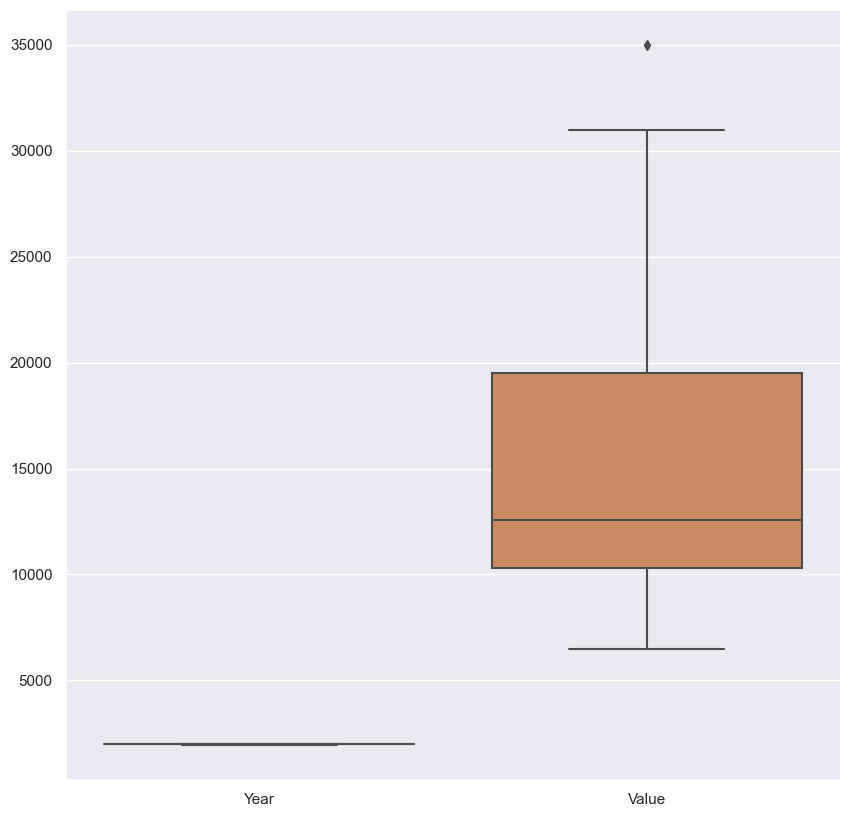

In [20]:
# just to visualize.
sns.boxplot(data=df3[['Year',
       'Value']])
fig=plt.gcf()
fig.set_size_inches(10,10)

<AxesSubplot:xlabel='Value'>

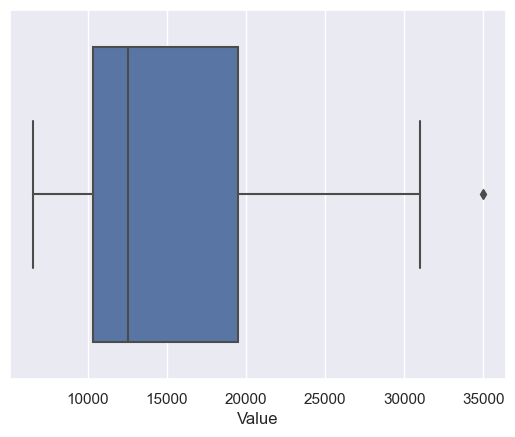

In [21]:
sns.boxplot(x=df3["Value"], whis=1.5)  

In [22]:
df.shape

(180, 5)

In [23]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year       29.5
Value    9202.5
dtype: float64


In [24]:
df3 = df3[~((df3 < (Q1-1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
df3.shape

(59, 5)

<AxesSubplot:xlabel='Year'>

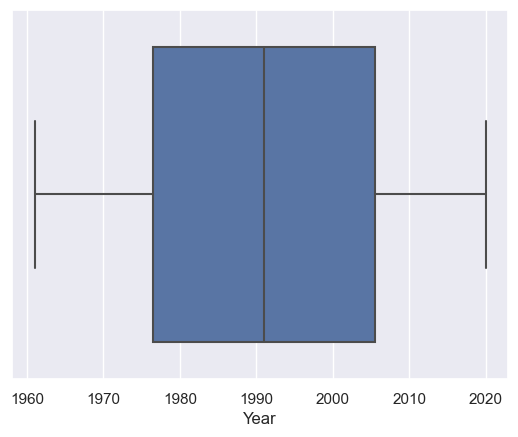

In [26]:
sns.boxplot(x=df3["Year"], whis=1.5)  

<AxesSubplot:ylabel='Year'>

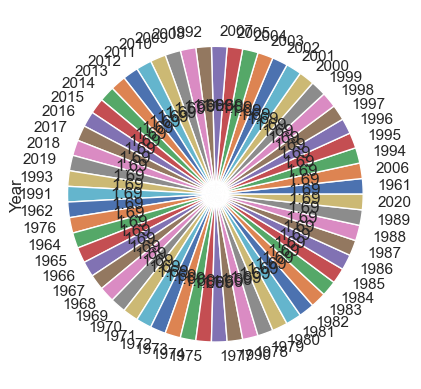

In [27]:
df3['Year'].value_counts().plot.pie(autopct= '%.2f')

In [28]:
df3.head(5)

,Element,Year,Unit,Value,Flag Description
126,Production,1961,tonnes,29000.0,Official figure
127,Production,1962,tonnes,31000.0,Official figure
129,Production,1964,tonnes,24000.0,Official figure
130,Production,1965,tonnes,21000.0,Official figure
131,Production,1966,tonnes,17000.0,Official figure


In [29]:
df3 = pd.get_dummies(df3, columns = ['Flag Description'], prefix = 'Flag', drop_first=False)
df3.head(30)

,Element,Year,Unit,Value,Flag_Official figure
126,Production,1961,tonnes,29000.0,1
127,Production,1962,tonnes,31000.0,1
129,Production,1964,tonnes,24000.0,1
130,Production,1965,tonnes,21000.0,1
131,Production,1966,tonnes,17000.0,1
132,Production,1967,tonnes,16000.0,1
133,Production,1968,tonnes,20000.0,1
134,Production,1969,tonnes,22000.0,1
135,Production,1970,tonnes,20000.0,1
136,Production,1971,tonnes,13000.0,1


# Переидексация

In [30]:
df3 = df3.groupby('Year')['Value'].sum().reset_index()
df3.head()

,Year,Value
0,1961,29000.0
1,1962,31000.0
2,1964,24000.0
3,1965,21000.0
4,1966,17000.0


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_features = df3.copy()
col_names = ['Year','Value']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
df3 = scaled_features
df3.head()



In [31]:
# set index for Date column

df3.set_index('Year', inplace=True)
df3.index.name = 'Year'

df3.head()

,Value
Year,
1961,29000.0
1962,31000.0
1964,24000.0
1965,21000.0
1966,17000.0


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1961 to 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


In [33]:
# Spliting the dataset into independent and dependent variables
X = df3.drop(['Year'],axis=1)
y = df3['Year']

KeyError: "['Year'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

# Display the rows and coulmns of X, y, X_train, y_train, X_test, y_test
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

# Naive Bayes

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

In [ ]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]

In [ ]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

In [ ]:
df3.head()

# Spliting the dataset into independent and dependent variables
X = df3.drop(['Year','Element','Unit'],axis=1)
y = df3['Year']

from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label) 